https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import os
import numpy as np
import pandas as pd

# Simple autoencoder

In [2]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
autoencoder.layers


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
encoder.layers

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
decoder.layers

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

2021-12-18 02:36:12.296868: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2812 - val_loss: 0.1918
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1725 - val_loss: 0.1541
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1446 - val_loss: 0.1329
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1273 - val_loss: 0.1196
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1163 - val_loss: 0.1106
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1090 - val_loss: 0.1049
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1042 - val_loss: 0.1010
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1008 - val_loss: 0.0981
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0985 - val_loss: 0.0962
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0969 - val_loss: 0.094

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

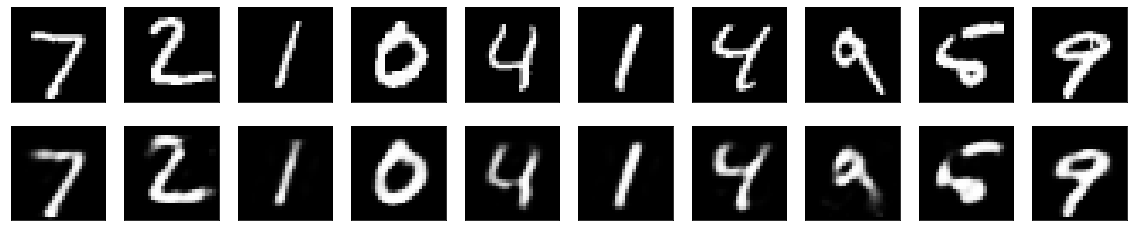

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.2833 - val_loss: 0.1970
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1787 - val_loss: 0.1617
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1532 - val_loss: 0.1436
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1385 - val_loss: 0.1316
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1287 - val_loss: 0.1237
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1220 - val_loss: 0.1182
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1172 - val_loss: 0.1141
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1137 - val_loss: 0.1110
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1111 - val_loss: 0.1089
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1093 - val_

## Deep

In [12]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [13]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 13ms/step - loss: 0.2513 - val_loss: 0.1680
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1511 - val_loss: 0.1368
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1315 - val_loss: 0.1243
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1220 - val_loss: 0.1175
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1159 - val_loss: 0.1125
Epoch 6/100
235/235 [==============================] - 4s 15ms/step - loss: 0.1119 - val_loss: 0.1091
Epoch 7/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1091 - val_loss: 0.1066
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1065 - val_loss: 0.1040
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1043 - val_loss: 0.1024
Epoch 10/100
235/235 [==============================] - 3s 13ms/step - loss: 0.102

In [14]:
encoded_imgs = encoder.predict(x_test[:10])
decoded_imgs = decoder.predict(encoded_imgs)

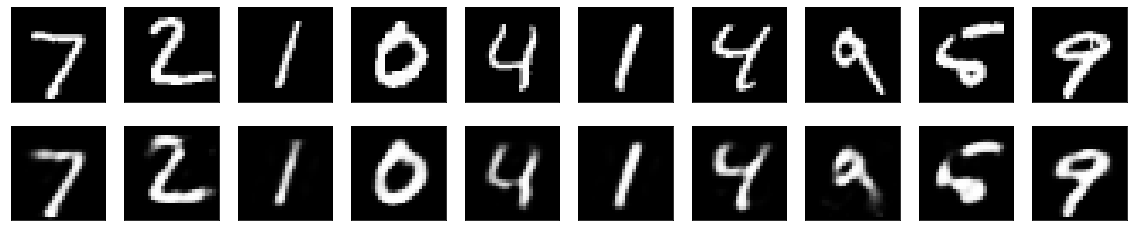

In [15]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Conv

In [16]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [18]:
%load_ext tensorboard

In [19]:
%tensorboard --logdir logs

In [20]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='logs')])

2021-12-18 02:47:18.580244: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-18 02:47:18.580542: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-18 02:47:18.581901: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/50
  5/469 [..............................] - ETA: 22s - loss: 0.6886

2021-12-18 02:47:19.830569: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-18 02:47:19.830960: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-18 02:47:19.865670: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-18 02:47:19.872460: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-18 02:47:19.886238: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2021_12_18_02_47_19

2021-12-18 02:47:19.887668: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2021_12_18_02_47_19/8907e1d2fb69.trace.json.gz
2021-12-18 02:47:19.904058: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2021_12_18_02_47_19

2021-12-18 02:47:19.905273: I

469/469 [==============================] - 18s 36ms/step - loss: 0.2217 - val_loss: 0.1505
Epoch 2/50
469/469 [==============================] - 17s 36ms/step - loss: 0.1400 - val_loss: 0.1303
Epoch 3/50
469/469 [==============================] - 17s 37ms/step - loss: 0.1262 - val_loss: 0.1205
Epoch 4/50
469/469 [==============================] - 16s 34ms/step - loss: 0.1184 - val_loss: 0.1145
Epoch 5/50
469/469 [==============================] - 17s 36ms/step - loss: 0.1135 - val_loss: 0.1103
Epoch 6/50
469/469 [==============================] - 16s 35ms/step - loss: 0.1104 - val_loss: 0.1077
Epoch 7/50
469/469 [==============================] - 18s 38ms/step - loss: 0.1080 - val_loss: 0.1059
Epoch 8/50
469/469 [==============================] - 16s 34ms/step - loss: 0.1062 - val_loss: 0.1042
Epoch 9/50
469/469 [==============================] - 17s 36ms/step - loss: 0.1048 - val_loss: 0.1029
Epoch 10/50
469/469 [==============================] - 16s 34ms/step - loss: 0.1036 - val_los

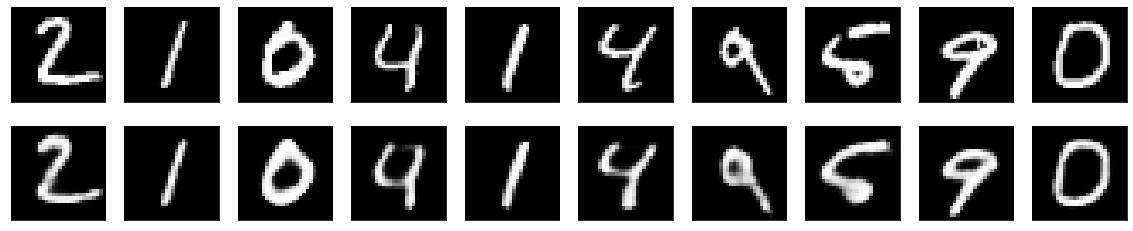

In [21]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

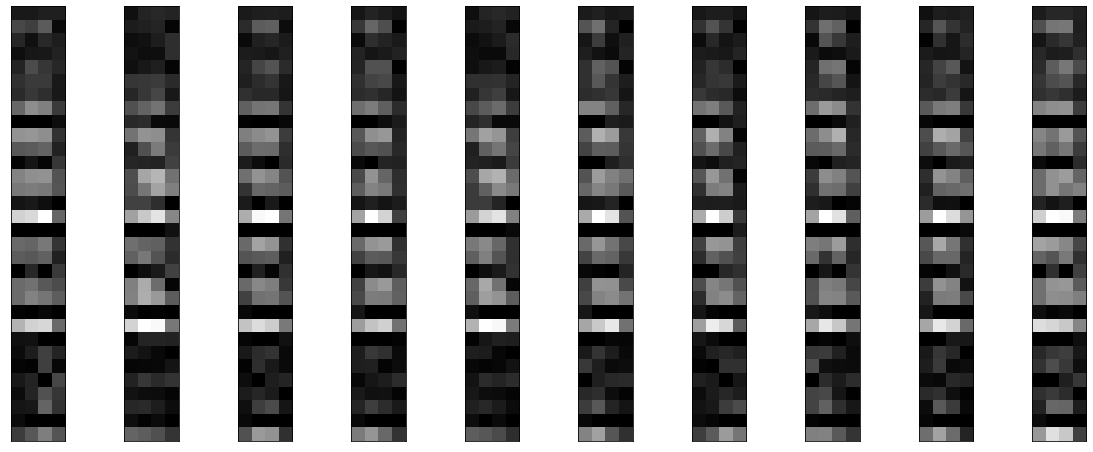

In [22]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## denoising

In [23]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

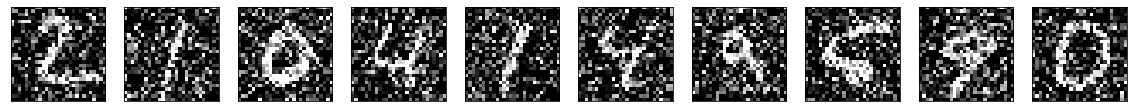

In [24]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

2021-12-18 03:03:05.460307: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-18 03:03:05.460365: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-18 03:03:05.460452: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/100
  3/469 [..............................] - ETA: 45s - loss: 0.6764

2021-12-18 03:03:06.435793: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-12-18 03:03:06.435915: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-12-18 03:03:06.552028: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-18 03:03:06.553681: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-12-18 03:03:06.556435: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /tmp/tb/train/plugins/profile/2021_12_18_03_03_06

2021-12-18 03:03:06.557531: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /tmp/tb/train/plugins/profile/2021_12_18_03_03_06/8907e1d2fb69.trace.json.gz
2021-12-18 03:03:06.561082: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /tmp/tb/train/plugins/profile/2021_12_18_03_03_06

2021-12-18 03:03:06.

469/469 [==============================] - 35s 73ms/step - loss: 0.1684 - val_loss: 0.1156
Epoch 2/100
469/469 [==============================] - 34s 73ms/step - loss: 0.1123 - val_loss: 0.1078
Epoch 3/100
469/469 [==============================] - 34s 73ms/step - loss: 0.1073 - val_loss: 0.1050
Epoch 4/100
469/469 [==============================] - 38s 82ms/step - loss: 0.1044 - val_loss: 0.1023
Epoch 5/100
469/469 [==============================] - 34s 73ms/step - loss: 0.1025 - val_loss: 0.1013
Epoch 6/100
469/469 [==============================] - 34s 73ms/step - loss: 0.1011 - val_loss: 0.0996
Epoch 7/100
469/469 [==============================] - 34s 72ms/step - loss: 0.1000 - val_loss: 0.0989
Epoch 8/100
469/469 [==============================] - 39s 82ms/step - loss: 0.0992 - val_loss: 0.0982
Epoch 9/100
469/469 [==============================] - 34s 73ms/step - loss: 0.0985 - val_loss: 0.0976
Epoch 10/100
469/469 [==============================] - 34s 73ms/step - loss: 0.0978 

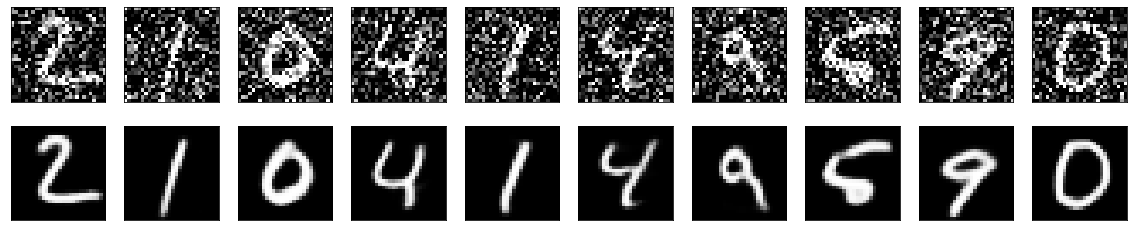

In [27]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## VAE

In [28]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [29]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [30]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [31]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 185.2825 - val_loss: 167.4518
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 165.1219 - val_loss: 163.1631
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 161.9562 - val_loss: 160.7431
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 159.9044 - val_loss: 159.3402
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 158.4291 - val_loss: 158.0206
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 157.2687 - val_loss: 156.9032
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 156.3136 - val_loss: 156.1996
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 155.4913 - val_loss: 155.2748
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 154.7845 - val_loss: 154.8969
Epoch 10/10
1875/1875 [===================

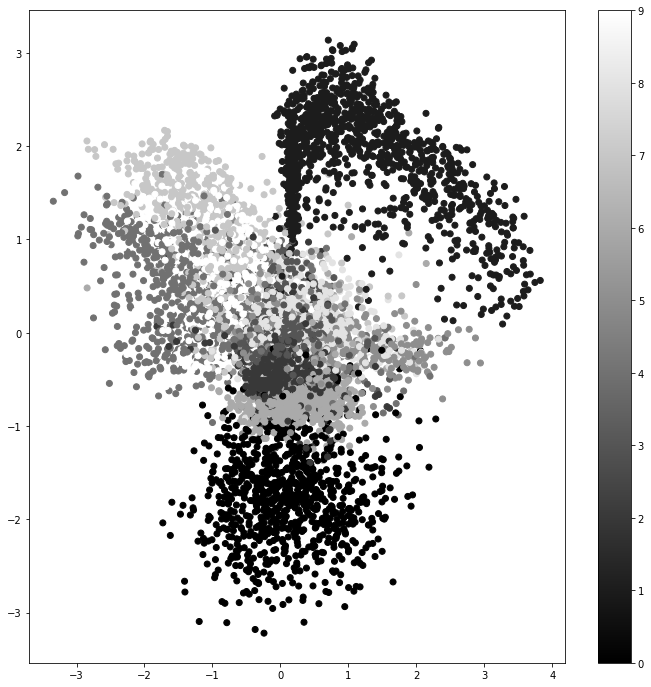

In [33]:
import matplotlib.pyplot as plt
x_test_encoded = encoder.predict(x_test, batch_size=32)
#x_test_encoded = np.concatenate(np.array(x_test_encoded), axis=0)
x_test_encoded[0].shape
plt.figure(figsize=(12, 12))
plt.scatter(x_test_encoded[2][:, 0], x_test_encoded[2][:, 1], c=y_test)
plt.colorbar()
plt.show()

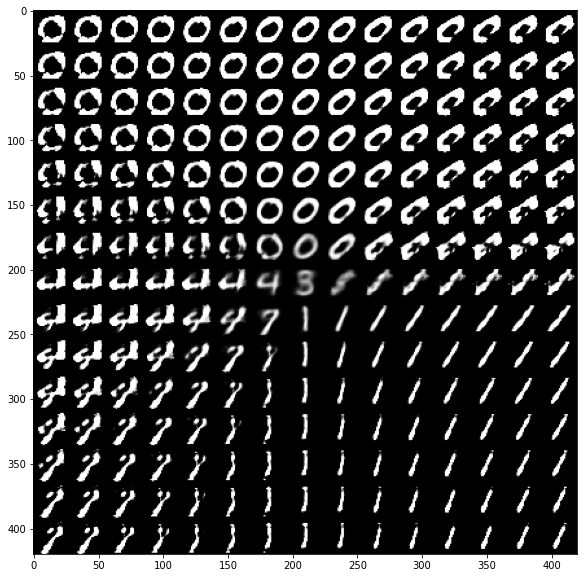

In [34]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()